# Environment setup :

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# %cd

In [ ]:
import warnings
warnings.filterwarnings('ignore')

# 0. Importing necessary libraries & modules :

In [ ]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn import linear_model
import matplotlib.pyplot as plt
import os

In [ ]:
np.random.seed(42)

# 1. Loading the data :

In [ ]:
bikesData = pd.read_csv('bikes.csv')

In [ ]:
bikesData.shape

(17379, 17)

In [ ]:
bikesData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [ ]:
bikesData.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
hr              int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

# 2. Performing EDA -Exploratory Data Analysis- on the dataset :

2.1 Summary Statistics :

In [ ]:
bikesData.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


2.2 Distribution Analysis :

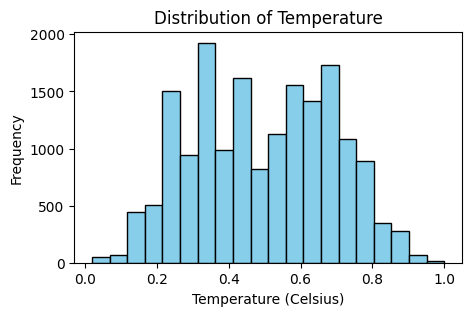

In [ ]:
# Temperature
plt.figure(figsize=(5, 3))
plt.hist(bikesData['temp'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Temperature')
plt.xlabel('Temperature (Celsius)')
plt.ylabel('Frequency')
plt.show()

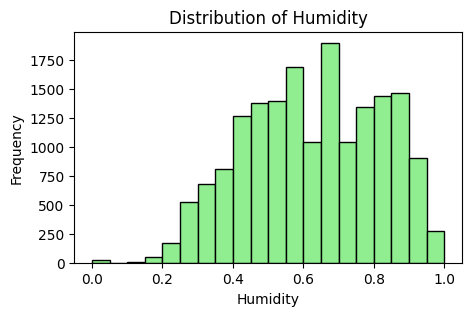

In [ ]:
# Humidity
plt.figure(figsize=(5, 3))
plt.hist(bikesData['hum'], bins=20, color='lightgreen', edgecolor='black')
plt.title('Distribution of Humidity')
plt.xlabel('Humidity')
plt.ylabel('Frequency')
plt.show()

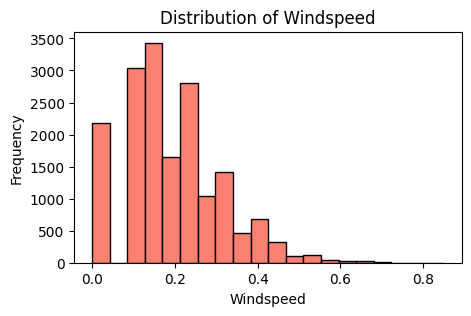

In [ ]:
# Windspeed
plt.figure(figsize=(5, 3))
plt.hist(bikesData['windspeed'], bins=20, color='salmon', edgecolor='black')
plt.title('Distribution of Windspeed')
plt.xlabel('Windspeed')
plt.ylabel('Frequency')
plt.show()

2.3 Time Series Analysis :

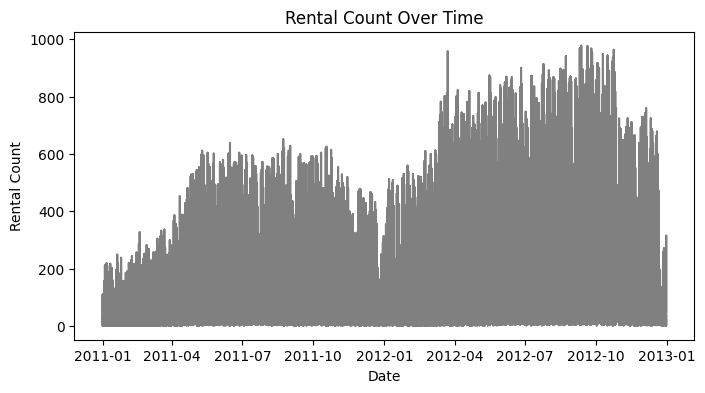

In [ ]:
bikesData['dteday'] = pd.to_datetime(bikesData['dteday'])
plt.figure(figsize=(8, 4))
plt.plot(bikesData['dteday'], bikesData['cnt'], color='gray')
plt.title('Rental Count Over Time')
plt.xlabel('Date')
plt.ylabel('Rental Count')
plt.show()

2.4 Correlation Analysis :

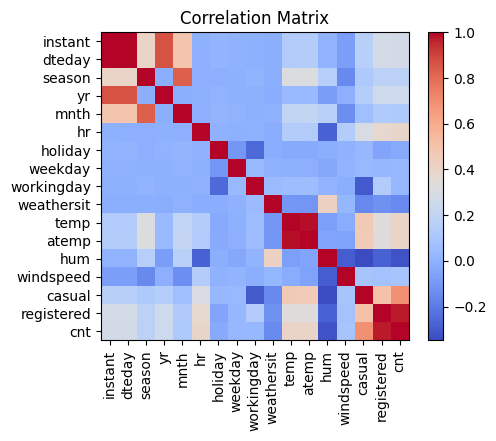

In [ ]:
correlation_matrix = bikesData.corr()
plt.figure(figsize=(5, 4))
plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='nearest')
plt.colorbar()
plt.title('Correlation Matrix')
plt.xticks(range(len(correlation_matrix)), correlation_matrix.columns, rotation=90)
plt.yticks(range(len(correlation_matrix)), correlation_matrix.columns)
plt.show()

# 3. Clean the dataset :

By dropping irrelevant columns :

1. **instant** - This is just an index holder.
2. **casual** - It contains the count of casual bike riders, which are already included in the overall users count i.e. 'cnt', hence not needed.
3. **registered** - It contains the registered bike riders, which again, like the casual riders, are already included in the overall users count i.e. 'cnt', hence not needed.
4. **atemp** - It is the 'feel' temperature, which may not be needed, as we already have 'temp' feature which contains temperature of the area - duplicate feature, hence not needed.
5. **dteday** - It is the Date. Since, our prediction is not based on the Date, its based on hour of the day, hence Date is not needed.

In [ ]:
columnsToDrop = ['instant', 'casual', 'registered', 'atemp', 'dteday']

bikesData = bikesData.drop(columnsToDrop, axis=1)

bikesData.shape

(17379, 12)

# 4. Train Test split :

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
bikesData['dayCount'] = pd.Series(range(bikesData.shape[0]))/24

In [ ]:
train_set, test_set = train_test_split(bikesData, test_size=0.3, random_state=42)

print("Train set shape:", train_set.shape)
print("Test set shape:", test_set.shape)

Train set shape: (12165, 13)
Test set shape: (5214, 13)


In [ ]:
train_set.sort_values('dayCount', axis= 0, inplace=True)
test_set.sort_values('dayCount', axis= 0, inplace=True)

function *display_scores*

In [ ]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

# 5. Feature scaling :

In [ ]:
columnsToScale = ['temp', 'hum', 'windspeed']

scaler = StandardScaler()

train_set[columnsToScale] = scaler.fit_transform(train_set[columnsToScale])

In [ ]:
test_set[columnsToScale] = scaler.transform(test_set[columnsToScale])

In [ ]:
train_set.describe()

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt,dayCount
count,12165.000000,12165.000000,12165.000000,12165.000000,12165.000000,12165.000000,12165.000000,12165.000000,1.216500e+04,1.216500e+04,1.216500e+04,12165.000000,12165.000000
mean,2.510399,0.501767,6.562351,11.579038,0.027949,3.004603,0.681381,1.426634,-1.869081e-17,2.371396e-16,1.401811e-16,191.237649,362.552038
std,1.105498,0.500017,3.430356,6.925790,0.164834,2.010245,0.465960,0.639961,1.000041e+00,1.000041e+00,1.000041e+00,182.900931,209.592847
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,-2.476000e+00,-3.245965e+00,-1.552670e+00,1.000000,0.041667
25%,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,-8.186290e-01,-7.628859e-01,-6.962541e-01,40.000000,181.333333
50%,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,1.005628e-02,1.307622e-02,-2.069907e-01,145.000000,361.791667
75%,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,8.387416e-01,8.407692e-01,5.264946e-01,282.000000,545.333333
max,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,2.599698e+00,1.927116e+00,5.419128e+00,976.000000,724.083333


# 6. Training various models on the data :

In [ ]:
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

In [ ]:
X_train = train_set.drop(columns=['cnt'])
y_train = train_set[['cnt']]

6.1. Decision Tree Model :

In [ ]:
dec_reg = DecisionTreeRegressor(random_state=42)

In [ ]:
dt_mae_scores = -cross_val_score(dec_reg, X_train, y_train, cv=10, scoring="neg_mean_absolute_error")

In [ ]:
display_scores(dt_mae_scores)

Scores: [42.94494659 50.37222679 36.95891537 44.26211997 46.99589154 71.98026316
 58.19901316 48.87417763 50.84868421 96.46217105]
Mean: 54.7898409457034
Standard deviation: 16.563759407187572


In [ ]:
dt_mse_scores = np.sqrt(-cross_val_score(dec_reg, X_train, y_train, cv=10, scoring="neg_mean_squared_error"))
display_scores(dt_mse_scores)

Scores: [ 65.39786583  77.67402864  60.57274567  73.73250527  75.48574011
 113.22922285  96.5884429   82.11639785  86.86752618 149.13680359]
Mean: 88.0801278896052
Standard deviation: 24.927341207369675


6.2. Linear Regression Model :

In [ ]:
lin_reg = LinearRegression()

In [ ]:
lr_mae_scores = -cross_val_score(lin_reg, X_train, y_train, cv=10, scoring="neg_mean_absolute_error")
display_scores(lr_mae_scores)

Scores: [ 66.96340699  80.48809095 113.84704981  93.17230086  76.11197672
  96.5220689  133.13798218 158.02254734 158.90195479 127.15674717]
Mean: 110.4324125694233
Standard deviation: 31.426965705295228


In [ ]:
lr_mse_scores = np.sqrt(-cross_val_score(lin_reg, X_train, y_train, cv=10, scoring="neg_mean_squared_error"))
display_scores(lr_mse_scores)

Scores: [ 84.63836676 111.12038541 131.88324414 119.16350622 105.17621319
 127.72562924 174.97188817 187.31691741 205.60028279 164.30585678]
Mean: 141.19022901181867
Standard deviation: 37.55565075919534


6.3. Random Forest Model :

In [ ]:
forest_reg = RandomForestRegressor(random_state=42, n_estimators=150)

In [ ]:
rf_mae_scores = -cross_val_score(forest_reg, X_train, y_train, cv=10, scoring="neg_mean_absolute_error")
display_scores(rf_mae_scores)

Scores: [33.39666393 33.54451931 28.50225692 31.78826623 36.55658724 57.81963268
 40.96405702 40.84652961 37.57766447 84.69771382]
Mean: 42.56938912059061
Standard deviation: 15.980256848600963


In [ ]:
rf_mse_scores = np.sqrt(-cross_val_score(forest_reg, X_train, y_train, cv=10, scoring="neg_mean_squared_error"))
display_scores(rf_mse_scores)

Scores: [ 45.64176074  50.97205843  43.37588352  52.2640926   60.46557726
  94.24478873  66.26045287  65.45672124  61.69916554 131.9727285 ]
Mean: 67.23532294382946
Standard deviation: 25.544513111074128


Therefore, the model with minimum mean and std of `Mean Absolute Errors` and `Mean Squared Errors` that will be further fine-tuning is `RandomForestRegressor`

# 7. Fine-tuning the chosen model :

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
param_grid = [
    {'n_estimators': [120, 150],
     'max_features': [10, 12],
     'max_depth': [15, 28]}
]

In [ ]:
grid_search = GridSearchCV(
    estimator=forest_reg,
    param_grid=param_grid,
    cv=5,
    scoring='neg_mean_squared_error'
)

In [ ]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=RandomForestRegressor(n_estimators=150, random_state=42),
             param_grid=[{'max_depth': [15, 28], 'max_features': [10, 12],
                          'n_estimators': [120, 150]}],
             scoring='neg_mean_squared_error')

In [ ]:
print("Best Estimator:", grid_search.best_estimator_)
print("Best Hyperparameters:", grid_search.best_params_)

Best Estimator: RandomForestRegressor(max_depth=28, max_features=10, n_estimators=150,
                      random_state=42)
Best Hyperparameters: {'max_depth': 28, 'max_features': 10, 'n_estimators': 150}


In [ ]:
feature_importances = grid_search.best_estimator_.feature_importances_

print(feature_importances)

[0.00424888 0.00145493 0.00570279 0.58348648 0.00215107 0.01790669
 0.06993018 0.01688336 0.09373438 0.03176755 0.00907719 0.16365649]


# 8. Evaluate the model :

In [ ]:
final_model = grid_search.best_estimator_

In [ ]:
test_x_cols = test_set.drop('cnt', axis=1).columns.values

test_y_cols = 'cnt'

In [ ]:
X_test = test_set.loc[:, test_x_cols]
y_test = test_set.loc[:, test_y_cols]

In [ ]:
test_set.loc[:,'predictedCounts_test'] = final_model.predict(X_test)

In [ ]:
mse = mean_squared_error(y_test, test_set.loc[:,'predictedCounts_test'])

In [ ]:
final_mse = np.sqrt(mse)

In [ ]:
final_mse

39.47930005837265

# Plotting the predicted values v/s actual values

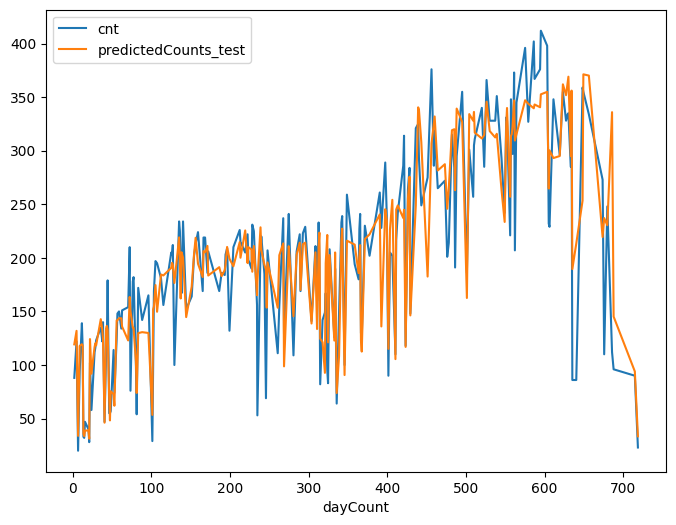

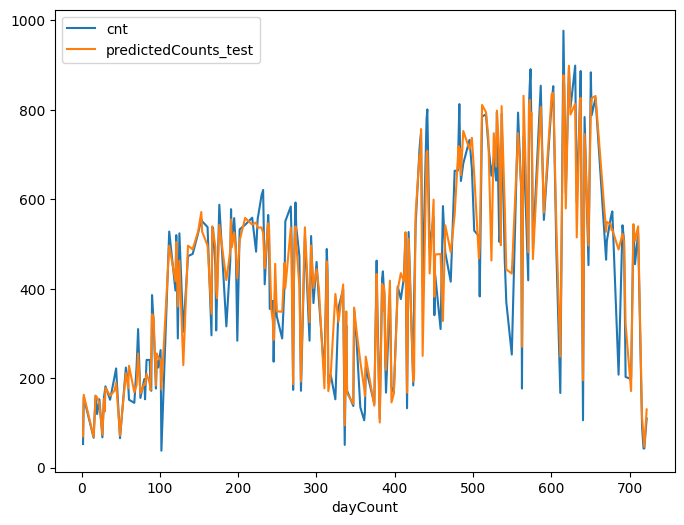

In [ ]:
times = [9,18]
for time in times:
    fig = plt.figure(figsize=(8, 6))
    fig.clf()
    ax = fig.gca()
    test_set_freg_time = test_set[test_set.hr == time]
    test_set_freg_time.plot(kind = 'line', x = 'dayCount', y = 'cnt', ax = ax)
    test_set_freg_time.plot(kind = 'line', x = 'dayCount', y = 'predictedCounts_test', ax =ax)
    plt.show()